In [1]:
%config IPCompleter.greedy=True

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images_scaled = train_images / 255
test_images_scaled = test_images / 255

model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [4]:
model.fit(train_images_scaled.reshape(-1, 28, 28, 1), train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 319us/sample - loss: 0.4463 - accuracy: 0.8366
Epoch 2/5
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2975 - accuracy: 0.8913
Epoch 3/5
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2497 - accuracy: 0.9086
Epoch 4/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2197 - accuracy: 0.9188
Epoch 5/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.1917 - accuracy: 0.9284


In [7]:
model.evaluate(test_images_scaled.reshape(-1, 28, 28, 1), test_labels)

10000/10000 [==============================] - 2s 189us/sample - loss: 0.2642 - accuracy: 0.9041


[0.26424020159840583, 0.9041]

In [8]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
pred = activation_model.predict(test_images_scaled[0].reshape(1, 28, 28, 1))

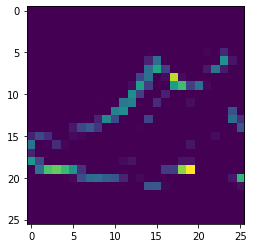

In [9]:
plt.imshow(pred[0][0, :, :, 1]) # 卷积，第二个过滤器

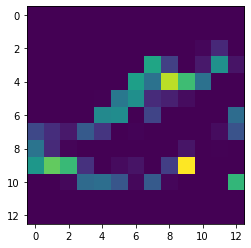

In [10]:
plt.imshow(pred[1][0, :, :, 1]) # maxpooling